# Introduction

Hello everyone! This is my data analysis with the video game sales dataset. I am actually very excited to explore more about this dataset because I am myself a video game fan. So let's load the data and take a quick look!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


In [2]:
full_data = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')

In [3]:
full_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
print(full_data.columns.unique())
len(full_data.columns.unique())

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


11

In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
print(full_data.columns[full_data.isna().any()].unique())
len(full_data.columns[full_data.isna().any()].unique())

Index(['Year', 'Publisher'], dtype='object')


2

OK, so we see that this dataset contains 11 columns of information.


**The columns are:**

* Rank - Ranking of overall sales, integer

* Name - The games name

* Platform - Platform of the games release (i.e. PC,PS4, etc.), object

* Year - Year of the game's release, float

* Genre - Genre of the game ,object

* Publisher - Publisher of the game, object

* NA_Sales - Sales in North America (in millions), float

* EU_Sales - Sales in Europe (in millions), float

* JP_Sales - Sales in Japan (in millions), float

* Other_Sales - Sales in the rest of the world (in millions), float

* Global_Sales - Total worldwide sales, float


We also see that two of the columns contain missing values. Let's take a quick look at these two columns.

**Year**

In [7]:
full_data['Year'].isna().sum()

271

In [8]:
full_data['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [9]:
full_data.loc[full_data['Year'].isna()].head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


In [10]:
year_corr = full_data.corr()["Year"]
year_corr.abs().sort_values(ascending=False)[1:]

Rank            0.178814
JP_Sales        0.169316
NA_Sales        0.091402
Global_Sales    0.074735
Other_Sales     0.041058
EU_Sales        0.006014
Name: Year, dtype: float64

I cannot really come up with an idea of how to fill these missing year values. It is certainly not too correlated with other columns as the list shows. I will just drop all rows with missing values.

In [11]:
full_data.drop(full_data.loc[full_data['Year'].isna()].index, inplace=True)

In [12]:
full_data.shape

(16327, 11)

**Publisher**

In [13]:
full_data['Publisher'].isna().sum()

36

In [14]:
print(len(full_data['Publisher'].unique()))
print(full_data['Publisher'].unique())

577
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' 'Majesco Entertainment' 'Codemasters'
 'Red Orb' 'Level 5' 'Arena Entertainment' 'Midway Games' 'JVC'
 'Deep Silver' '989 Studios' 'NCSoft' 'UEP Systems' 'Parker Bros.' 'Maxis'
 'Imagic' 'Tecmo Koei' 'Valve Software' 'ASCII Entertainment' 'Mindscape'
 'Infogrames' 'Unknown' 'Square' 'Valve' 'Activision Value' 'Banpresto'
 'D3Publisher' 'Oxygen Interactive' 'Red Storm Entertainmen

In [15]:
full_data.loc[full_data['Publisher'].isna()].head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.0,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.0,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.0,0.01,0.53
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.0,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.0,0.01,0.42
5647,5649,Cartoon Network Collection: Game Boy Advance V...,GBA,2005.0,Misc,NaN,0.23,0.08,0.0,0.01,0.32
6437,6439,Sonic X: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.19,0.07,0.0,0.00,0.27
6562,6564,Dora the Explorer: Game Boy Advance Video Volu...,GBA,2004.0,Misc,NaN,0.18,0.07,0.0,0.00,0.26


I don't want to drop more data, so perhaps here I will just give them a Publisher value of 'Unknown'

In [16]:
full_data.loc[full_data['Publisher'].isna(), 'Publisher'] = 'Unknown'

In [17]:
full_data['Publisher'].isna().sum()

0

# Univariate Data Analysis

Now we have take a quick look at the data. I say we can see more distributions of variables regarding video game sales. (Rank and names obviously don't need to be examined individually)

**Platform**

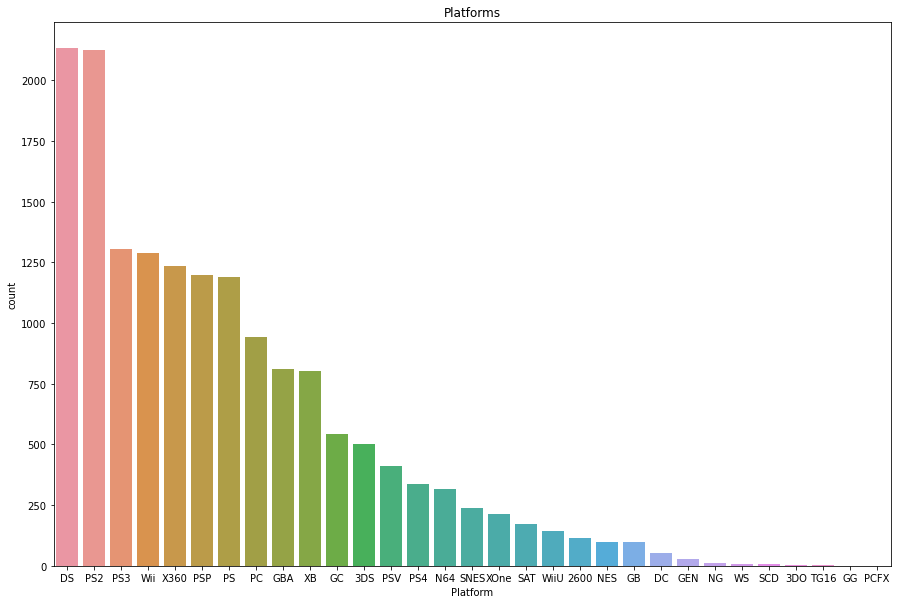

DS      13.064249
PS2     13.027500
PS3      7.986770
Wii      7.901023
X360     7.564158
PSP      7.331414
PS       7.282416
PC       5.775709
GBA      4.967232
XB       4.918234
GC       3.319655
3DS      3.062412
PSV      2.523427
PS4      2.057941
N64      1.935444
SNES     1.463833
XOne     1.304587
SAT      1.059595
WiiU     0.875850
2600     0.710480
NES      0.600233
GB       0.594108
DC       0.318491
GEN      0.165370
NG       0.073498
WS       0.036749
SCD      0.036749
3DO      0.018374
TG16     0.012250
GG       0.006125
PCFX     0.006125
Name: Platform, dtype: float64


In [18]:
plt.figure(figsize=(15, 10))
plt.title("Platforms")
sns.countplot(x=full_data['Platform'], order=full_data['Platform'].value_counts().index)
plt.show()

print(full_data['Platform'].value_counts() / full_data.shape[0] * 100)

So we see that the most popular platforms are like DS, PS2, PS3, PC, and etc. This follows our expectations.

**Year**

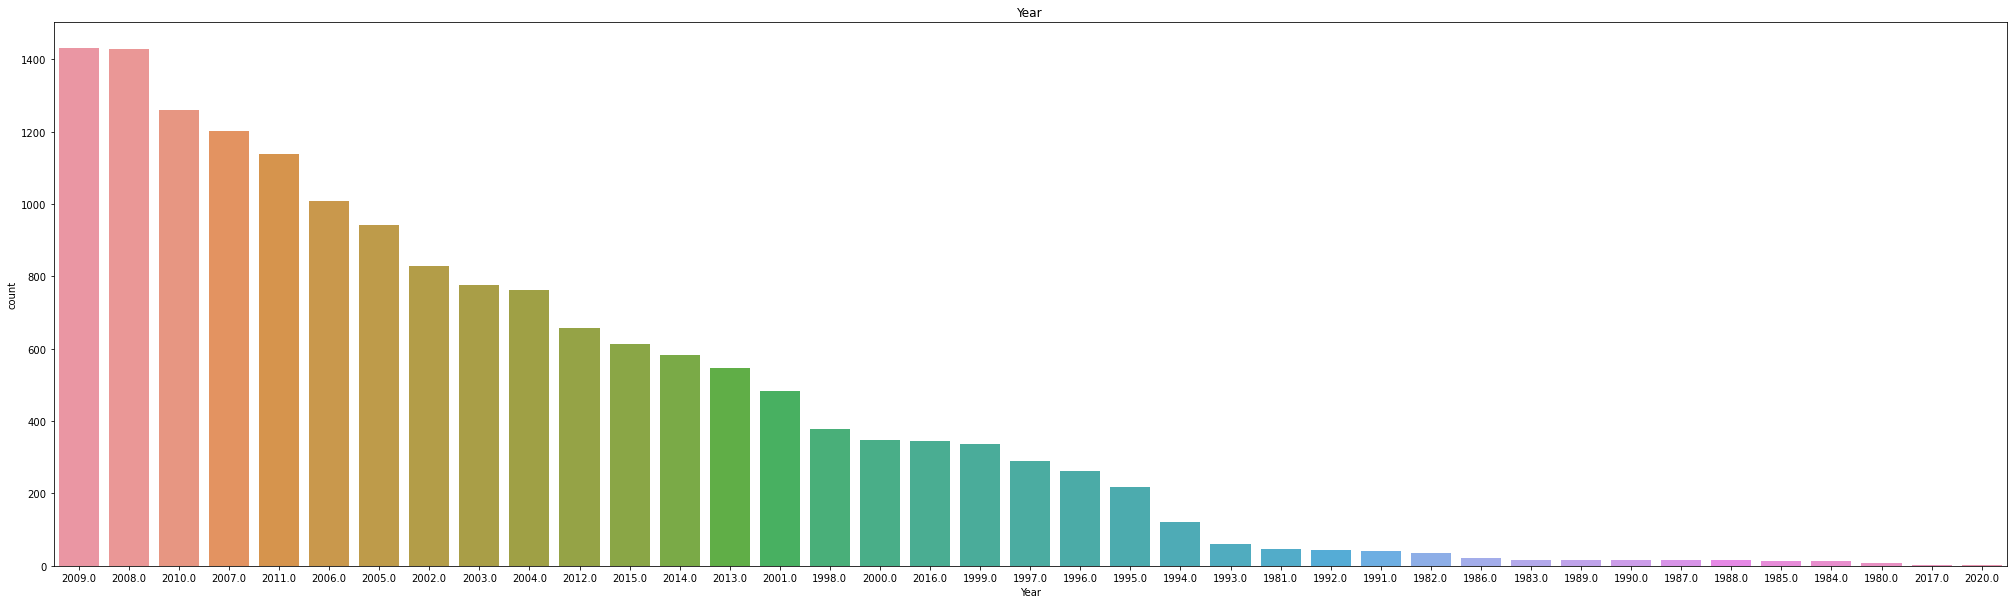

2009.0    8.764623
2008.0    8.746249
2010.0    7.711153
2007.0    7.362038
2011.0    6.976174
2006.0    6.173823
2005.0    5.763459
2002.0    5.077479
2003.0    4.746739
2004.0    4.673241
2012.0    4.024009
2015.0    3.760642
2014.0    3.564648
2013.0    3.344154
2001.0    2.952165
1998.0    2.321308
2000.0    2.137564
2016.0    2.106939
1999.0    2.070190
1997.0    1.770074
1996.0    1.610829
1995.0    1.341336
1994.0    0.741104
1993.0    0.367489
1981.0    0.281742
1992.0    0.263367
1991.0    0.251118
1982.0    0.220494
1986.0    0.128621
1983.0    0.104122
1989.0    0.104122
1990.0    0.097997
1987.0    0.097997
1988.0    0.091872
1985.0    0.085748
1984.0    0.085748
1980.0    0.055123
2017.0    0.018374
2020.0    0.006125
Name: Year, dtype: float64


In [19]:
plt.figure(figsize=(35, 10))
plt.title("Year")
sns.countplot(x=full_data['Year'], order=full_data['Year'].value_counts().index)
plt.show()

print(full_data['Year'].value_counts() / full_data.shape[0] * 100)

We see that most games were released around 2010, which I think is partly due to the time this dataset was collected and partly because that time period was when devices like computer or game station really gained popularity.

**Genre**

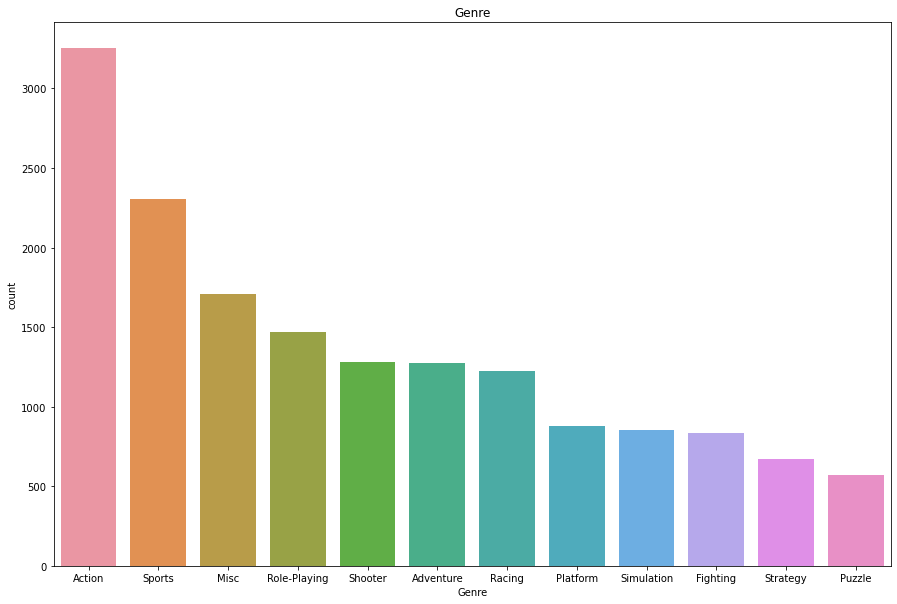

Action          19.924052
Sports          14.111594
Misc            10.473449
Role-Playing     9.009616
Shooter          7.852024
Adventure        7.815275
Racing           7.509034
Platform         5.365346
Simulation       5.212225
Fighting         5.120353
Strategy         4.109757
Puzzle           3.497274
Name: Genre, dtype: float64


In [20]:
plt.figure(figsize=(15, 10))
plt.title("Genre")
sns.countplot(x=full_data['Genre'], order=full_data['Genre'].value_counts().index)
plt.show()

print(full_data['Genre'].value_counts() / full_data.shape[0] * 100)

This shows that the most popular genres are action and sports. Again, this kinda follows our expectations. Action games are usually the most popular kind.

**Publisher**

Since there are too many publishers, let's just focus on the top 10 most popular publishers.

In [21]:
top_ten = full_data['Publisher'].value_counts().head(10)

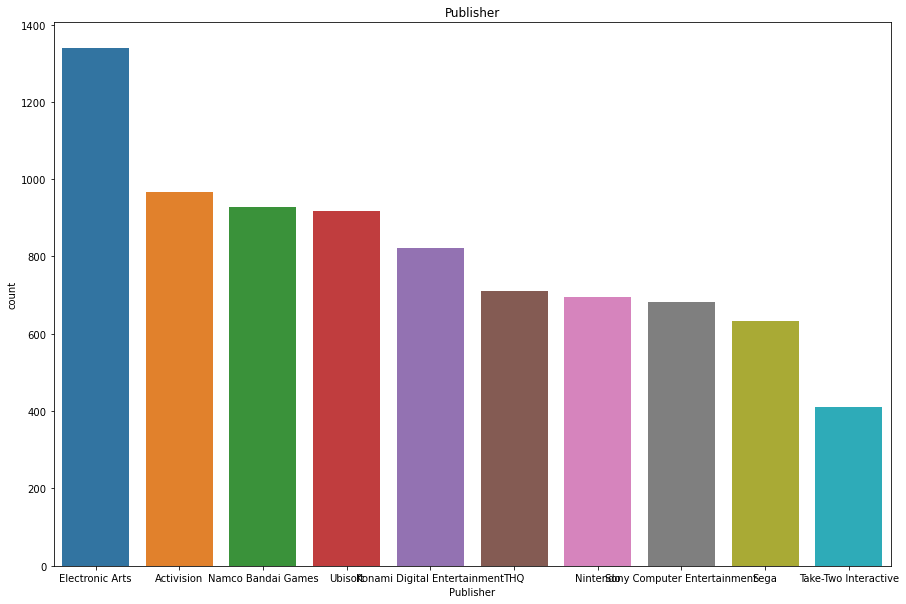

Electronic Arts                 8.201139
Activision                      5.916580
Namco Bandai Games              5.683837
Ubisoft                         5.622588
Konami Digital Entertainment    5.040730
THQ                             4.360875
Nintendo                        4.262877
Sony Computer Entertainment     4.177130
Sega                            3.870889
Take-Two Interactive            2.523427
Name: Publisher, dtype: float64


In [22]:
plt.figure(figsize=(15, 10))
plt.title("Publisher")
sns.countplot(x=full_data['Publisher'], order=top_ten.index)
plt.show()

print(top_ten / full_data.shape[0] * 100)

So basically the companies that sell the most amount of games are like EA, Activision, NBG, Ubisoft, and others. These companies are indeed the most famous ones out there.

**Sales in North America**

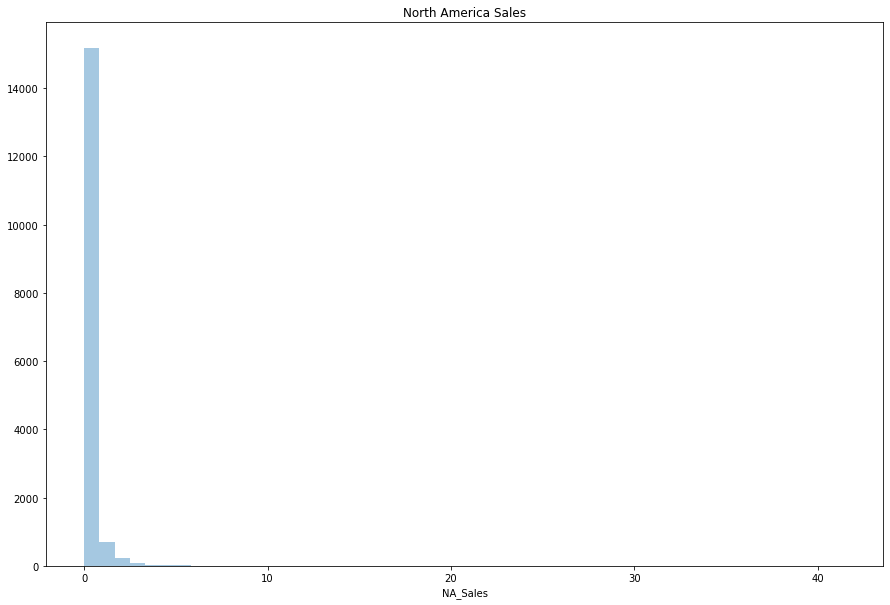

count    16327.000000
mean         0.265415
std          0.821591
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64


In [23]:
plt.figure(figsize=(15, 10))
plt.title("North America Sales")
sns.distplot(a=full_data['NA_Sales'], kde=False)
plt.show()

print(full_data['NA_Sales'].describe())

OK, so we see that the sales in North America is highly right-skewed. Most companies will not even make a million sales in NA, but there is a game that sold 41.49 million times! I wonder what game that is. Let's check out.

In [24]:
full_data.loc[full_data['NA_Sales'] == 41.49]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


Wii Sports it is. Also, this is actually the #1 game in the rank! No wonder why the game is this popular in North America.

**Sales in Europe**

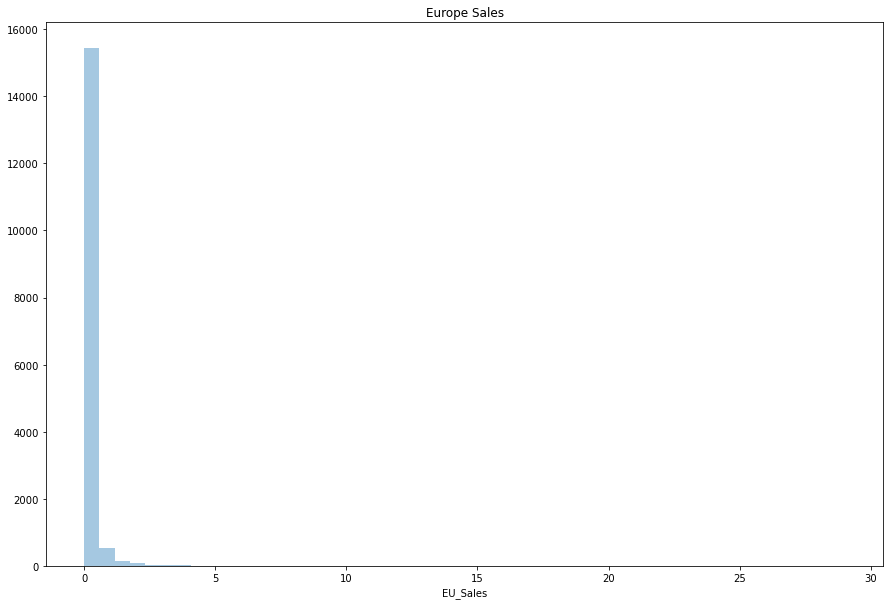

count    16327.000000
mean         0.147554
std          0.508766
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         29.020000
Name: EU_Sales, dtype: float64


In [25]:
plt.figure(figsize=(15, 10))
plt.title("Europe Sales")
sns.distplot(a=full_data['EU_Sales'], kde=False)
plt.show()

print(full_data['EU_Sales'].describe())

Again, the distribution is highly right skewed. This again indicates that the video game market is somewhat an oligopoly. Most companies will only have a small share in the market, but there are a few that will sell exponentially more. Also, let's check which game has the most sales in Europe. 

In [26]:
full_data.loc[full_data['EU_Sales'] == 29.02]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


Well, it is again Wii Sports.

**Sales in Japan**

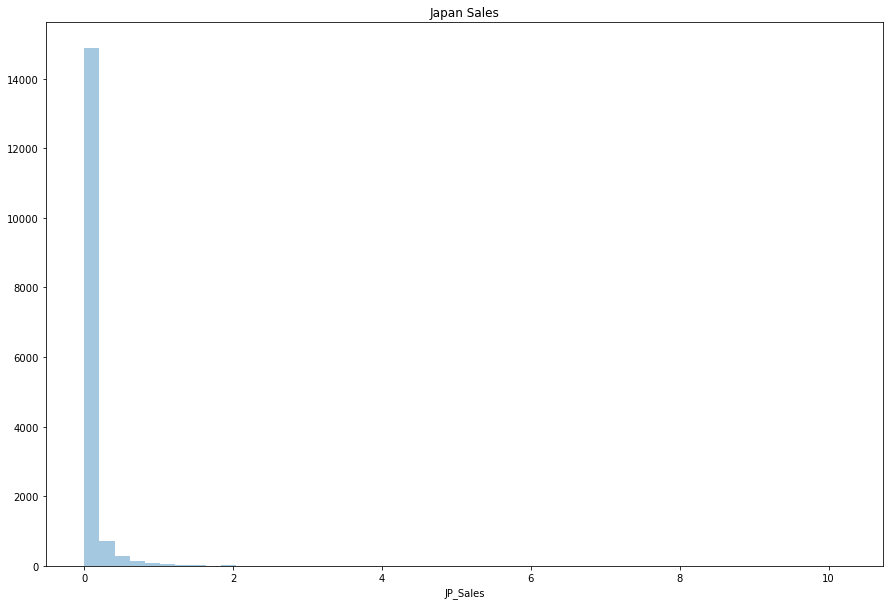

count    16327.000000
mean         0.078661
std          0.311557
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_Sales, dtype: float64


In [27]:
plt.figure(figsize=(15, 10))
plt.title("Japan Sales")
sns.distplot(a=full_data['JP_Sales'], kde=False)
plt.show()

print(full_data['JP_Sales'].describe())

Still right-skewed, and the game that has the most sale is:

In [28]:
full_data.loc[full_data['JP_Sales'] == 10.22]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37


Wow! This time it is not Wii Sport! It is actually Pokemon Red/Blue! This is actually a surprise to me. I would though that since Wii Sport is the number 1 game and is from Japan, Wii Sport would be the number 1 at Japan too. I guess this is the beauty of data analysis.

**Sales in the rest of the world**

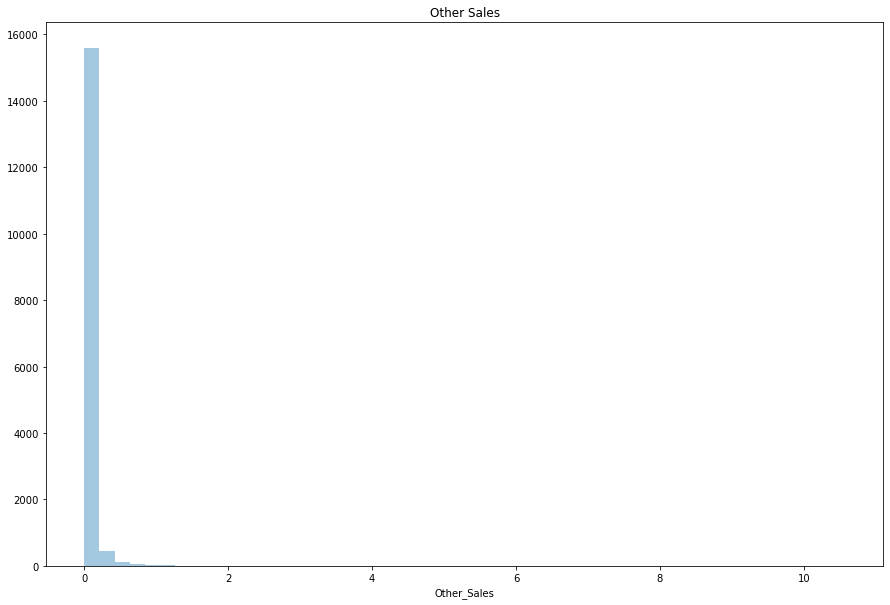

count    16327.000000
mean         0.048325
std          0.189885
min          0.000000
25%          0.000000
50%          0.010000
75%          0.040000
max         10.570000
Name: Other_Sales, dtype: float64


In [29]:
plt.figure(figsize=(15, 10))
plt.title("Other Sales")
sns.distplot(a=full_data['Other_Sales'], kde=False)
plt.show()

print(full_data['Other_Sales'].describe())

In [30]:
full_data.loc[full_data['Other_Sales'] == 10.57]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.4,0.41,10.57,20.81


OK, now for the other parts of the world, GTA San Andreas is actully the most sold game. Again, an interesting thing to learn. 

**Global Sales**

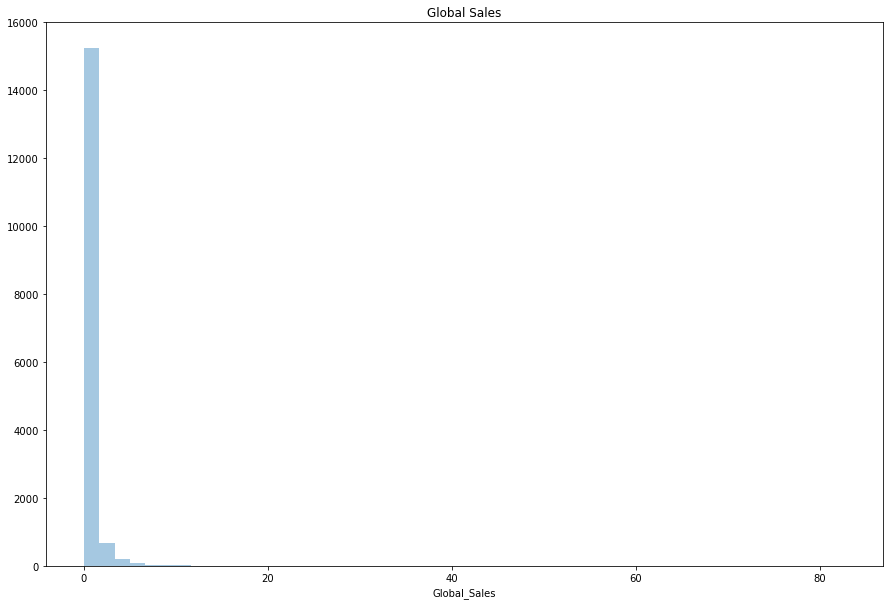

count    16327.000000
mean         0.540232
std          1.565732
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global_Sales, dtype: float64


In [31]:
plt.figure(figsize=(15, 10))
plt.title("Global Sales")
sns.distplot(a=full_data['Global_Sales'], kde=False)
plt.show()

print(full_data['Global_Sales'].describe())

In [32]:
full_data.loc[full_data['Global_Sales'] == 82.74]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


Now the global sales is shown. Again, it is visualized, and the game with the most sales is Wii Sport, which is indeed ranked #1 in our dataset.

# Define the Question

Now we have looked at the data, I begin to be curious about what factors will affect the global sales of a game. Obviously when predicting about this, we cannot use any of the region sale information or the rank as parameters for our model because that is data leakage. Therefore, we are left to only the Platform, Year, Genre, and Publisher columns. So I say let's now work on making a prediction of the global sales based on these four columns and see how accurate the prediction is.

# Other Parameters vs. Global Sales

Now since we are curious in how other parameters may affect the final global sales, let's actually visualize the associations between global sales and other parameters we are interested in. 

**Year vs. Global Sales**

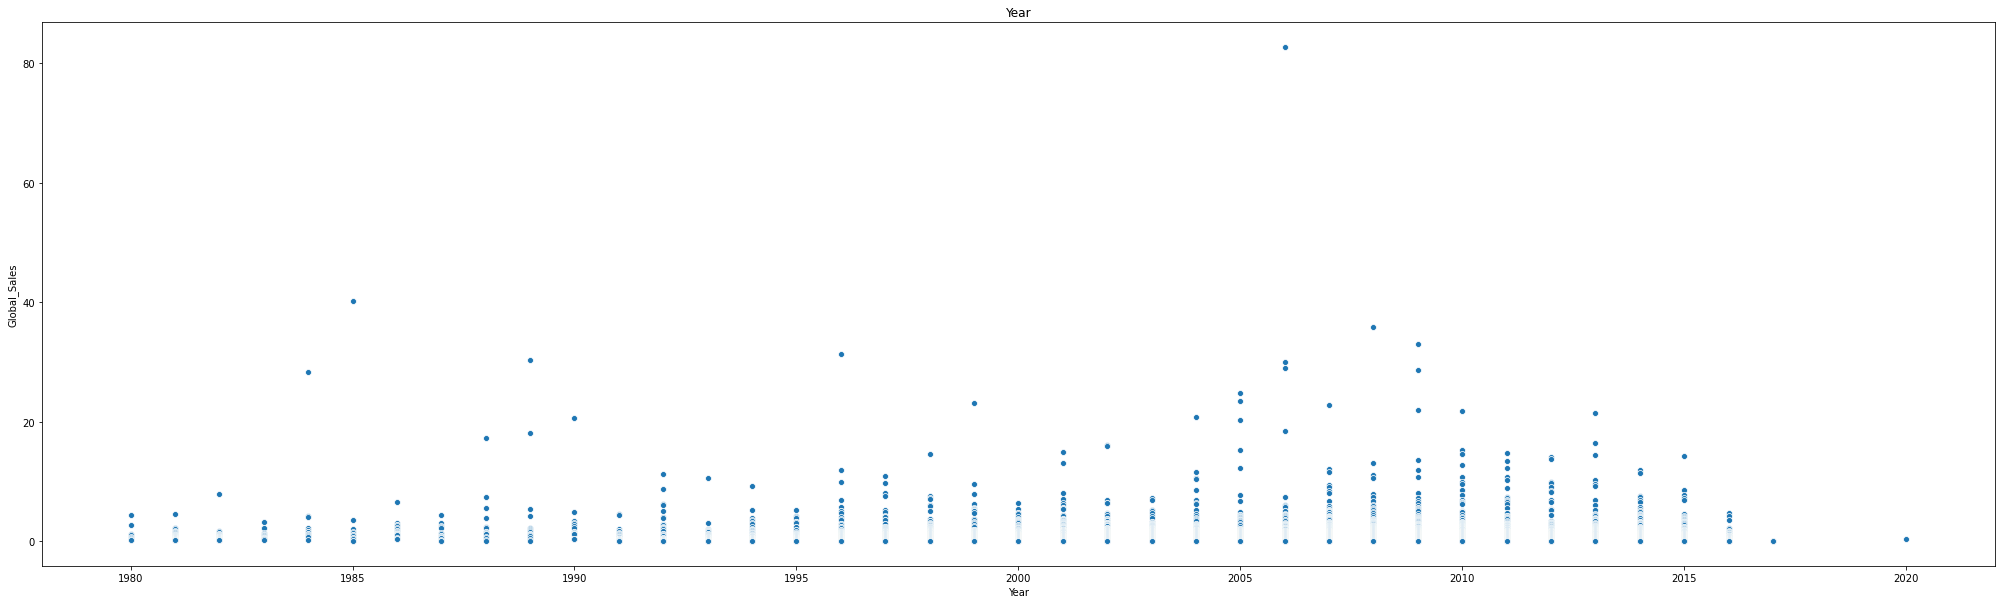

In [33]:
plt.figure(figsize=(35, 10))
plt.title("Year")
sns.scatterplot(x=full_data['Year'], y=full_data['Global_Sales'])
plt.show()

There isn't really an association between the year and the global sales of games. It is shown that most games would only make minimal global sales despite which year it is. So the global sale isn't really something that depends on the time.

**Platform vs. Global Sales**

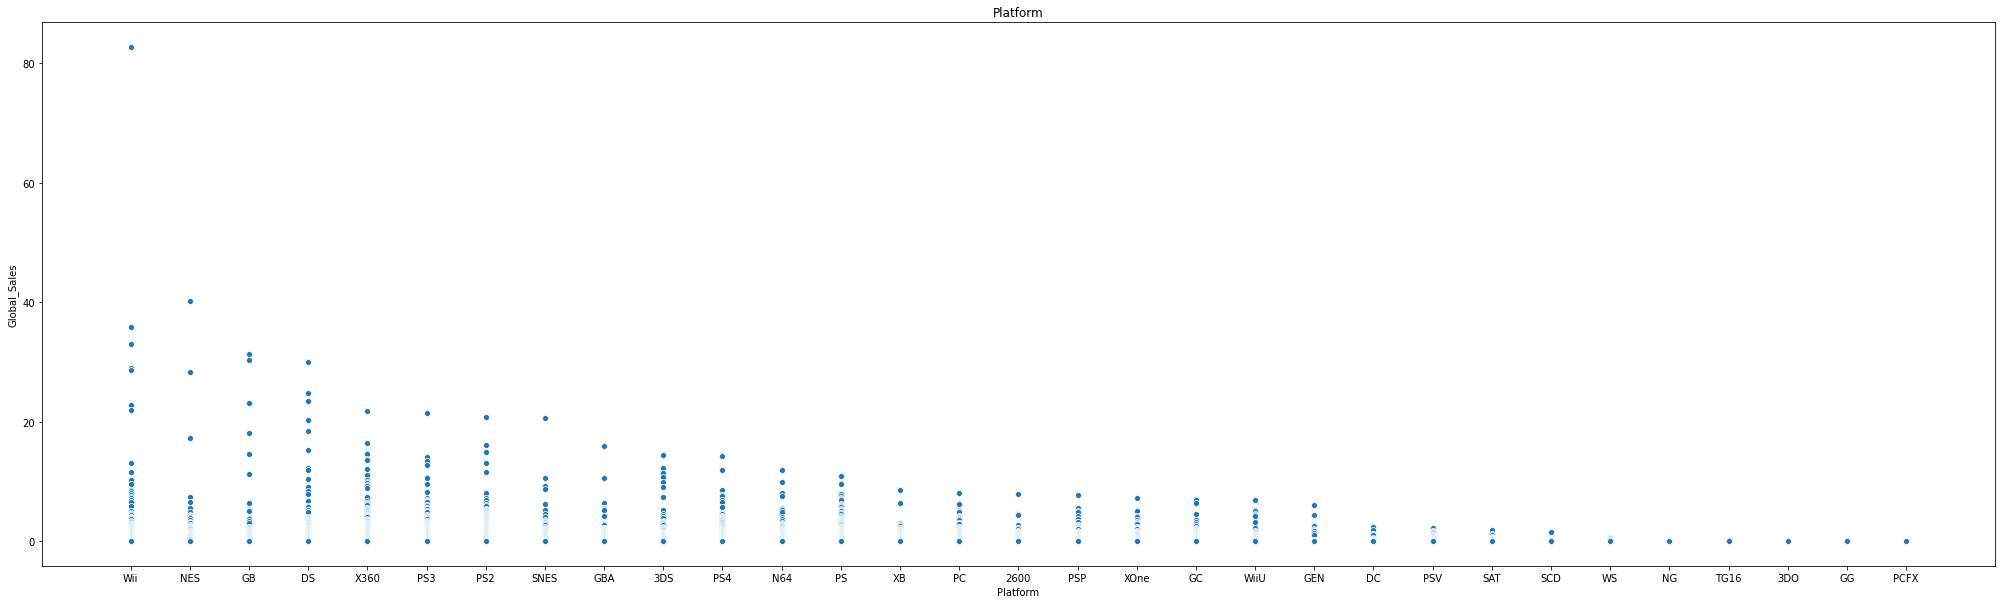

Wii   0.2
NES   1.375
GB   1.18
DS   0.11
X360   0.29
PS3   0.29
PS2   0.23
SNES   0.32
GBA   0.16
3DS   0.125
PS4   0.22
N64   0.27
PS   0.26
XB   0.14
PC   0.04
2600   0.475
PSP   0.09
XOne   0.24
GC   0.15
WiiU   0.23
GEN   0.15
DC   0.135
PSV   0.06
SAT   0.12
SCD   0.065
WS   0.215
NG   0.1
TG16   0.08
3DO   0.02
GG   0.04
PCFX   0.03


In [34]:
plt.figure(figsize=(35, 10))
plt.title("Platform")
sns.scatterplot(x=full_data['Platform'], y=full_data['Global_Sales'])
plt.show()

for plat in full_data['Platform'].unique():
    print(plat, " ", full_data.loc[full_data['Platform'] == plat, 'Global_Sales'].median())

So now there seems to be a little trend. It seems like games on platforms like Wii, NES, GB do have a higher global sales comparing to games on platforms like SAT. It is very likely that since devices like Wii are more popular, people are more likely to invest money on games that are on these platforms. 

**Genre vs. Global Sales**

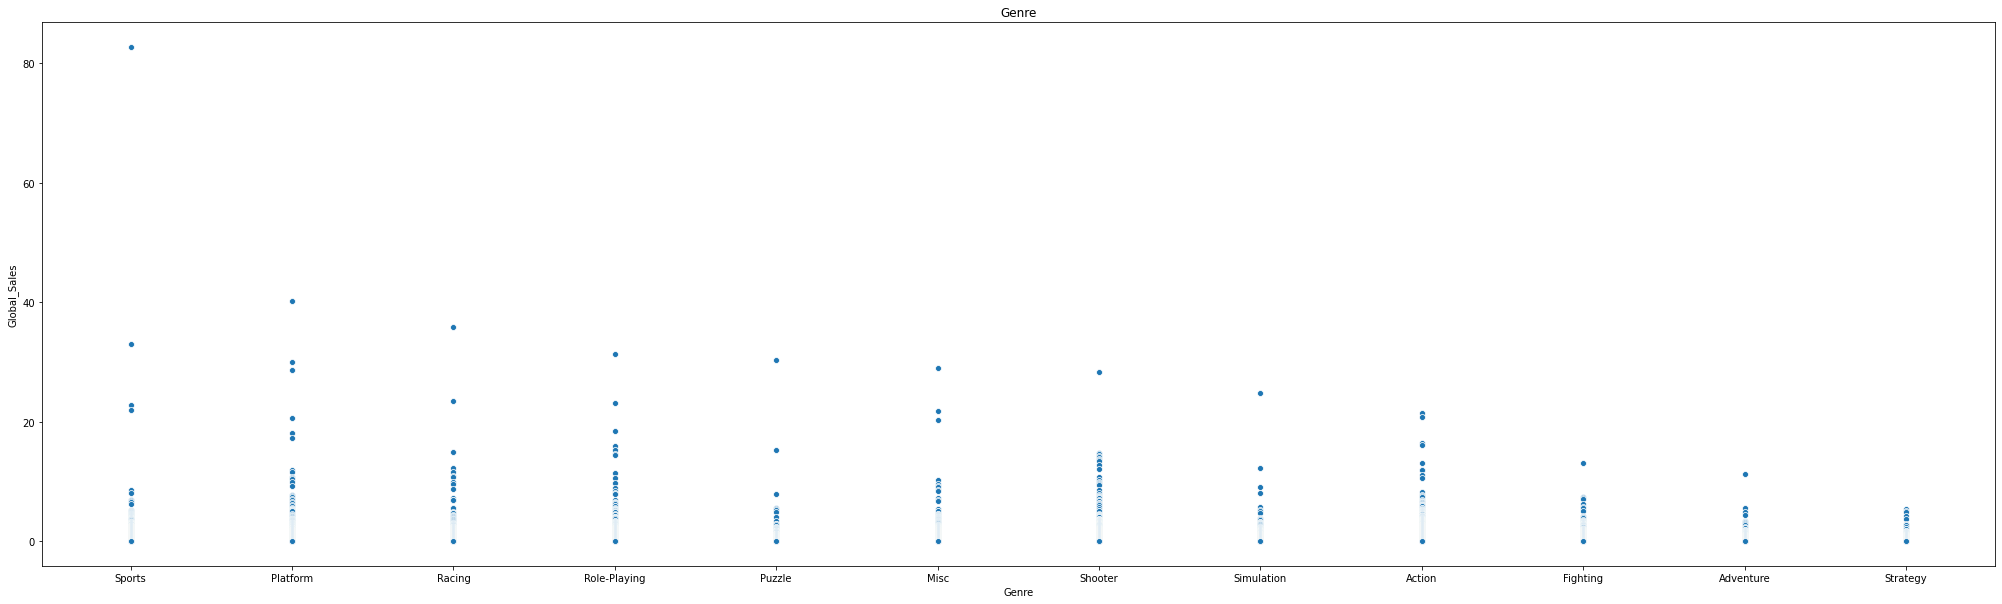

Sports   0.22
Platform   0.28
Racing   0.19
Role-Playing   0.19
Puzzle   0.1
Misc   0.16
Shooter   0.23
Simulation   0.16
Action   0.19
Fighting   0.21
Adventure   0.06
Strategy   0.09


In [35]:
plt.figure(figsize=(35, 10))
plt.title("Genre")
sns.scatterplot(x=full_data['Genre'], y=full_data['Global_Sales'])
plt.show()

for genr in full_data['Genre'].unique():
    print(genr, " ", full_data.loc[full_data['Genre'] == genr, 'Global_Sales'].median())

Again, small association between the genre of the game and the global sales. However, still not a significant association.

**Publisher vs. Global Sales**

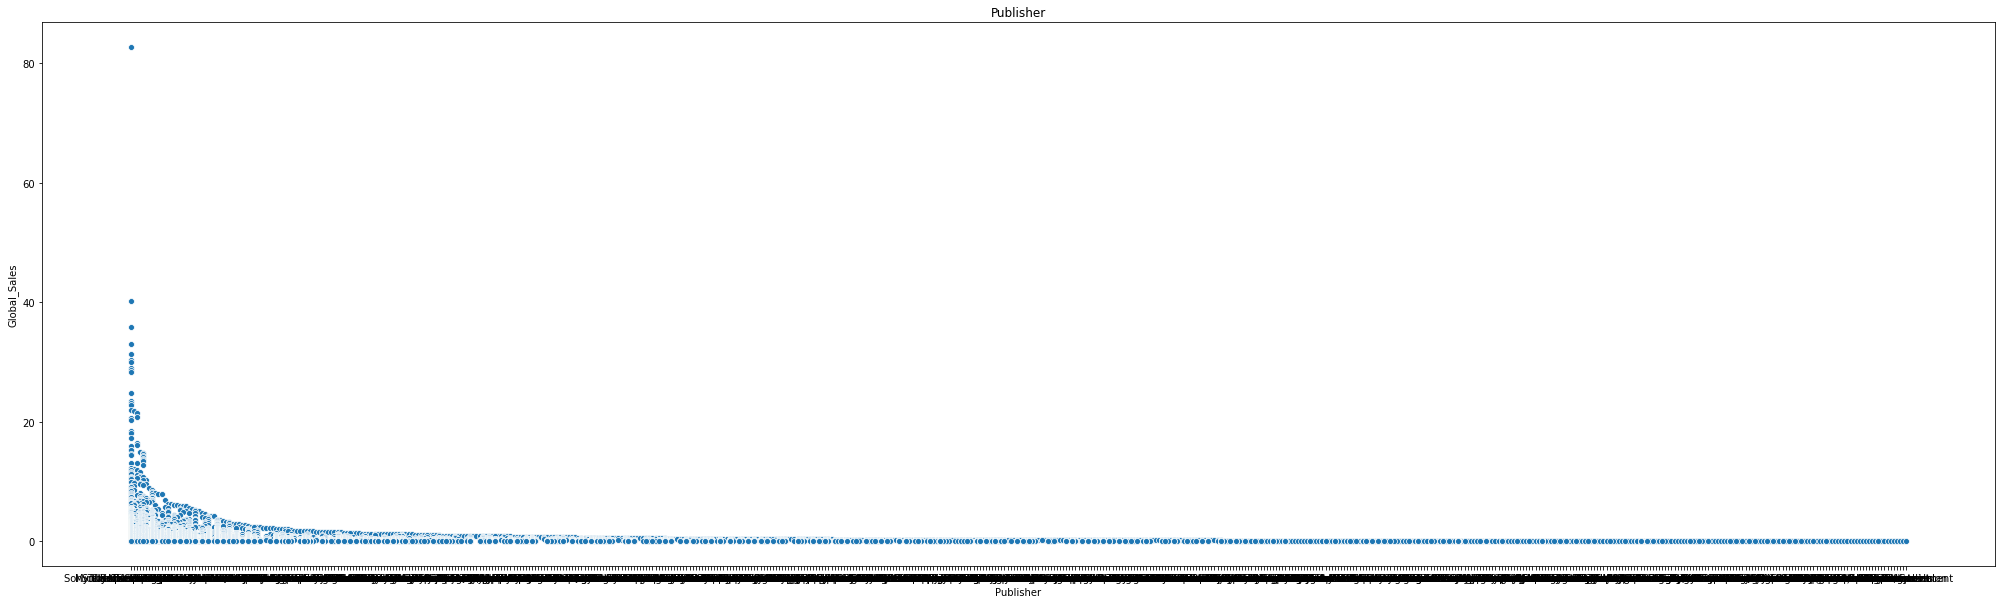

Nintendo   0.92
Microsoft Game Studios   0.36
Take-Two Interactive   0.305
Sony Computer Entertainment   0.34
Activision   0.28
Ubisoft   0.21
Bethesda Softworks   0.51
Electronic Arts   0.47
Sega   0.19
SquareSoft   0.69
Atari   0.18
505 Games   0.10500000000000001
Capcom   0.2
GT Interactive   0.25
Konami Digital Entertainment   0.15
Sony Computer Entertainment Europe   1.0
Square Enix   0.32
LucasArts   0.52
Virgin Interactive   0.23
Warner Bros. Interactive Entertainment   0.39
Universal Interactive   0.495
Eidos Interactive   0.18
RedOctane   1.745
Vivendi Games   0.17
Enix Corporation   0.655
Namco Bandai Games   0.12
Palcom   4.17
Hasbro Interactive   0.5599999999999999
THQ   0.27
Fox Interactive   0.46499999999999997
Acclaim Entertainment   0.195
MTV Games   0.235
Disney Interactive Studios   0.355
Majesco Entertainment   0.09
Codemasters   0.15
Red Orb   2.62
Level 5   0.19
Arena Entertainment   2.36
Midway Games   0.19
JVC   0.06
Deep Silver   0.1
989 Studios   0.69
NCSoft   

In [36]:
plt.figure(figsize=(35, 10))
plt.title("Publisher")
sns.scatterplot(x=full_data['Publisher'], y=full_data['Global_Sales'])
plt.show()

for pub in full_data['Publisher'].unique():
    print(pub, " ", full_data.loc[full_data['Publisher'] == pub, 'Global_Sales'].median())

The publisher also seems to have an effect on the global sales. Essentially, companies like Nintendo or Microsoft Game Studios are more likely to make games that have high sales. 

In conclusion, among these four parameters, it seems like the Year doesn't have a huge impact on the global sale, but the other three parameters all have an impact to certain extent. 

# Model Selection

In [37]:
num_features = ['Year']
cat_features = ['Platform', 'Genre', 'Publisher']

features = num_features + cat_features
X = full_data.drop(["Global_Sales"], axis=1)[features]
y = full_data["Global_Sales"]

num_transformer = SimpleImputer(strategy="constant")

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

base_models = [("DT_model", DecisionTreeRegressor(random_state=42)),
               ("RF_model", RandomForestRegressor(random_state=42,n_jobs=-1)),
               ("GB_model", GradientBoostingRegressor(random_state=42)),
               ("Ada_model", AdaBoostRegressor(random_state=42)),
               ("KNN_model", KNeighborsRegressor(n_jobs=-1))]

kfolds = 4 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

for name, model in base_models:
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    
    model_steps.fit(X_train, y_train)

    model_steps.fit(X_train, y_train)

    model_preds = model_steps.predict(X_test)

    print(f"{name} mean squared error result: {mean_squared_error(y_test, model_preds)}")

DT_model mean squared error result: 4.254447274220941
RF_model mean squared error result: 3.6231333280597857
GB_model mean squared error result: 3.25079130795933
Ada_model mean squared error result: 4.33705851619142
KNN_model mean squared error result: 3.5230545389514942


So these are our final performances. It is shown that Graident Boost Regressor has the best performance. 